In [1]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
TOP = os.getcwd().replace('notebooks', '')
processed_dir = TOP + 'data/processed/'
interim_dir = TOP + 'data/interim/'

In [7]:
df = pd.read_excel(interim_dir+'categorisatons_wscreening_constraints_final_picks_080823_v1.xlsx', index_col = [0])

In [8]:
df.shape

(14247, 133)

In [9]:
df.head()

,dtxsid,PREFERRED_NAME,CASRN,INCHIKEY,IUPAC_NAME,smiles,INCHI_STRING,MOLECULAR_FORMULA,AVERAGE_MASS,MONOISOTOPIC_MASS,...,silicon_containing,screenable,screenable_centroid,screenable_centroid_id,screenable_centroid_id2,screening_analogues,screening_dist,MaxMin_selection_picks,category_size,final_picks
0,DTXSID4063036,1-Nonyne,3452-09-3,OSSQSXOTMIGBCF-UHFFFAOYSA-N,Non-1-yne,CCCCCCCC#C,"InChI=1S/C9H16/c1-3-5-7-9-8-6-4-2/h1H,4-9H2,2H3",C9H16,124.227,124.125201,...,0.0,1,NaN,NaN,DTXSID9061097,DTXSID4063036,0.045455,0.0,between20-70,NaN
1,DTXSID30870753,1-Hexyne,693-02-7,CGHIBGNXEGJPQZ-UHFFFAOYSA-N,Hex-1-yne,CCCCC#C,"InChI=1S/C6H10/c1-3-5-6-4-2/h1H,4-6H2,2H3",C6H10,82.146,82.078250,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,between20-70,NaN
2,DTXSID7062374,"1,8-Nonadiyne",2396-65-8,DMOVPHYFYSASTC-UHFFFAOYSA-N,"Nona-1,8-diyne",C#CCCCCCC#C,"InChI=1S/C9H12/c1-3-5-7-9-8-6-4-2/h1-2H,5-9H2",C9H12,120.195,120.093900,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,between20-70,NaN
3,DTXSID9061097,1-Pentadecyne,765-13-9,DONJGKADZJEXRJ-UHFFFAOYSA-N,Pentadec-1-yne,CCCCCCCCCCCCCC#C,InChI=1S/C15H28/c1-3-5-7-9-11-13-15-14-12-10-8...,C15H28,208.389,208.219101,...,0.0,1,centroid,DTXSID9061097,DTXSID9061097,DTXSID9061097,0.000000,1.0,between20-70,1.0
4,DTXSID1061233,"1,7-Octadiyne",871-84-1,DSOJWVLXZNRKCS-UHFFFAOYSA-N,"Octa-1,7-diyne",C#CCCCCC#C,"InChI=1S/C8H10/c1-3-5-7-8-6-4-2/h1-2H,5-8H2",C8H10,106.168,106.078250,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,between20-70,NaN


In [20]:
df.columns.tolist()[:20]

['dtxsid',
 'PREFERRED_NAME',
 'CASRN',
 'INCHIKEY',
 'IUPAC_NAME',
 'smiles',
 'INCHI_STRING',
 'MOLECULAR_FORMULA',
 'AVERAGE_MASS',
 'MONOISOTOPIC_MASS',
 'DATA_SOURCES',
 'NUMBER_OF_PUBMED_ARTICLES',
 'PUBCHEM_DATA_SOURCES',
 'CPDAT_COUNT',
 'MolWeight',
 'nbAtoms',
 'nbHeavyAtoms',
 'nbC',
 'nbO',
 'nbN']

In [19]:
df[df.columns.tolist()[100:]]

,cluster_centroid,centroid,centroid2,analogues,Dist,lt65_picks,level2_cluster_centroid,cluster_d,lvl2_centroid,lvl2_centroid2,...,silicon_containing,screenable,screenable_centroid,screenable_centroid_id,screenable_centroid_id2,screening_analogues,screening_dist,MaxMin_selection_picks,category_size,final_picks
0,centroid,DTXSID4063036,DTXSID4063036,DTXSID4063036,0.000000,1,NaN,NaN,NaN,NaN,...,0.0,1,NaN,NaN,DTXSID9061097,DTXSID4063036,0.045455,0.0,between20-70,NaN
1,NaN,NaN,DTXSID4063036,DTXSID30870753,0.434783,0,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,between20-70,NaN
2,NaN,NaN,DTXSID4063036,DTXSID7062374,0.409091,0,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,between20-70,NaN
3,NaN,NaN,DTXSID4063036,DTXSID9061097,0.045455,0,NaN,NaN,NaN,NaN,...,0.0,1,centroid,DTXSID9061097,DTXSID9061097,DTXSID9061097,0.000000,1.0,between20-70,1.0
4,NaN,NaN,DTXSID4063036,DTXSID1061233,0.500000,0,NaN,NaN,NaN,NaN,...,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,between20-70,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14242,NaN,NaN,DTXSID20888680,DTXSID7070391,0.921348,0,NaN,NaN,NaN,NaN,...,0.0,1,NaN,NaN,DTXSID0060149,DTXSID7070391,0.878049,0.0,between20-70,NaN
14243,NaN,NaN,DTXSID20888680,DTXSID70889405,0.662162,0,NaN,NaN,NaN,NaN,...,0.0,1,NaN,NaN,DTXSID0060149,DTXSID70889405,0.920455,1.0,between20-70,1.0
14244,NaN,NaN,DTXSID20888680,DTXSID90886794,0.925532,0,NaN,NaN,NaN,NaN,...,0.0,1,NaN,NaN,DTXSID0060149,DTXSID90886794,0.910112,0.0,between20-70,NaN
14245,NaN,NaN,DTXSID20888680,DTXSID3073052,0.725490,0,NaN,NaN,NaN,NaN,...,0.0,1,NaN,NaN,DTXSID0060149,DTXSID3073052,0.849057,0.0,between20-70,NaN


In [27]:
res = (df
 .drop(['INCHIKEY',
         'nbAtoms',
 'nbHeavyAtoms',
 'nbC',
 'nbO',
 'nbN',
 'nbAromAtom',
 'nbRing',
 'nbHeteroRing',
 'Sp3Sp2HybRatio',
 'nbRotBd',
 'nbHBdAcc',
 'ndHBdDon',
        'TopoPolSurfAir',
 'MolarRefract',
 'CombDipolPolariz',
         'Kingdom',
 'Superclass',
        'cluster_centroid',
 'analogues',
 'Dist',
 'Class',
        'level2_cluster_centroid',
 'cluster_d',
         'screenable_centroid_id',
 'lvl2_centroid',
 'lvl2_centroid2',
 'lvl2_analogues',
 'lvl2_Dist',
 'IUPAC_NAME',
 'INCHI_STRING',
 'MOLECULAR_FORMULA',
 'AVERAGE_MASS',
 'MONOISOTOPIC_MASS',
 'DATA_SOURCES',
 'NUMBER_OF_PUBMED_ARTICLES',
 'PUBCHEM_DATA_SOURCES',
 'CPDAT_COUNT',
      'centroid2',
         'group_str',
        'screenable_centroid_id2','centroid'], axis = 1)
)

In [29]:
df = res[['dtxsid',
 'PREFERRED_NAME',
 'CASRN',
 'smiles',
 'errors',
 'qsar_ready_smiles',
 'physical_form',
 'NCC',
     'ClassyFire',
     'group',
      'final_centroid',
 'final_dist',
     'lt65_picks',
 'gt65_picks',
     'MaxMin_selection_picks',
 'diverse_picks',
     'category_size',
     'final_picks',
     'screenable',
 'screenable_centroid',
 'screenable_centroid_id',
 'screening_analogues',
 'screening_dist',
 'VENDOR_COUNT',
 'IN_SIGMA-ALDRICH',
 'tested.count',
 'phospho.substruct',
 'silico.substruct',
 'elements',
 'elements_permitted',
 'silicon_containing',
     'MolWeight',
 'nbLipinskiFailures',
 'LogP_pred',
 'LogP_predRange',
 'AD_LogP',
 'AD_index_LogP',
 'Conf_index_LogP',
 'MP_pred',
 'MP_predRange',
 'AD_MP',
 'AD_index_MP',
 'Conf_index_MP',
 'BP_pred',
 'BP_predRange',
 'AD_BP',
 'AD_index_BP',
 'Conf_index_BP',
 'LogVP_pred',
 'VP_predRange',
 'AD_VP',
 'AD_index_VP',
 'Conf_index_VP',
 'LogWS_pred',
 'WS_predRange',
 'AD_WS',
 'AD_index_WS',
 'Conf_index_WS',
 'LogHL_pred',
 'HL_predRange',
 'AD_HL',
 'AD_index_HL',
 'Conf_index_HL',
 'RT_pred',
 'AD_RT',
 'AD_index_RT',
 'Conf_index_RT',
 'RT_predRange',
 'LogKOA_pred',
 'KOA_predRange',
 'AD_KOA',
 'AD_index_KOA',
 'Conf_index_KOA',
 'ionization',
 'pKa_a_pred',
 'pKa_a_predRange',
 'pKa_b_pred',
 'pKa_b_predRange',
 'AD_pKa',
 'AD_index_pKa',
 'Conf_index_pKa',
 'LogD55_pred',
 'LogD55_predRange',
 'LogD74_pred',
 'LogD74_predRange',
 'AD_LogD',
 'AD_index_LogD',
 'Conf_index_LogD',
     'HLC',
 'WS_pred_mol/L',
 'WS_pred_mg/L']]

In [31]:
mapping = {k:v for k,v in zip(df.columns.tolist(), df.columns.tolist())}

In [33]:
mapping = {'dtxsid': 'dtxsid',
 'PREFERRED_NAME': 'PREFERRED_NAME',
 'CASRN': 'CASRN',
 'smiles': 'SMILES',
 'errors': 'Errors associated with processing SMILES',
 'qsar_ready_smiles': 'QSAR READY SMILES as produced by OPERA v2.8',
 'physical_form': 'Physical form estimated using EPA Sustainable Futures guidance based on Mpt, Bpt considerations',
 'NCC': 'EPA New Chemical Category',
 'ClassyFire': 'ClassyFire hybrid primary category',
 'group': 'Terminal category',
 'final_centroid': 'Medoid for the full landscape',
 'final_dist': 'Pairwise Jaccard distance between final medoid and associated chemical',
 'lt65_picks': 'Diverse candidate selections from terminal categories with less than 65 members',
 'gt65_picks': 'Diverse candidate selections from terminal categories with greater than 65 members',
 'MaxMin_selection_picks': 'MaxMin selection candidates',
 'diverse_picks': 'Diverse candidate selections',
 'category_size': 'Terminal category size',
 'final_picks': 'Suggested candidate substances',
 'screenable': 'Tag to denote whether substance is part of a constrained screenable landscape',
 'screenable_centroid': 'Medoid tag for the screenable inventory',
 'screenable_centroid_id': 'DTXSID identity for the medoid of the screenable inventory',
 'screening_dist': 'Pairwise Jaccard distance between screenable mediod and the associated chemical',
 'VENDOR_COUNT': 'Count of Vendors using Pubchem',
 'IN_SIGMA-ALDRICH': 'Tag for whether the vendor was Sigma Aldrich',
 'tested.count': 'Tag for whether substance has been already tested in ToxCast',
 'phospho.substruct': 'phospho.substruct',
 'silico.substruct': 'silico.substruct',
 'elements': 'elements',
 'elements_permitted': 'elements_permitted',
 'silicon_containing': 'silicon_containing',
 'MolWeight': 'MolWeight',
 'nbLipinskiFailures': 'nbLipinskiFailures',
 'LogP_pred': 'LogP_pred',
 'LogP_predRange': 'LogP_predRange',
 'AD_LogP': 'AD_LogP',
 'AD_index_LogP': 'AD_index_LogP',
 'Conf_index_LogP': 'Conf_index_LogP',
 'MP_pred': 'MP_pred',
 'MP_predRange': 'MP_predRange',
 'AD_MP': 'AD_MP',
 'AD_index_MP': 'AD_index_MP',
 'Conf_index_MP': 'Conf_index_MP',
 'BP_pred': 'BP_pred',
 'BP_predRange': 'BP_predRange',
 'AD_BP': 'AD_BP',
 'AD_index_BP': 'AD_index_BP',
 'Conf_index_BP': 'Conf_index_BP',
 'LogVP_pred': 'LogVP_pred',
 'VP_predRange': 'VP_predRange',
 'AD_VP': 'AD_VP',
 'AD_index_VP': 'AD_index_VP',
 'Conf_index_VP': 'Conf_index_VP',
 'LogWS_pred': 'LogWS_pred',
 'WS_predRange': 'WS_predRange',
 'AD_WS': 'AD_WS',
 'AD_index_WS': 'AD_index_WS',
 'Conf_index_WS': 'Conf_index_WS',
 'LogHL_pred': 'LogHL_pred',
 'HL_predRange': 'HL_predRange',
 'AD_HL': 'AD_HL',
 'AD_index_HL': 'AD_index_HL',
 'Conf_index_HL': 'Conf_index_HL',
 'RT_pred': 'RT_pred',
 'AD_RT': 'AD_RT',
 'AD_index_RT': 'AD_index_RT',
 'Conf_index_RT': 'Conf_index_RT',
 'RT_predRange': 'RT_predRange',
 'LogKOA_pred': 'LogKOA_pred',
 'KOA_predRange': 'KOA_predRange',
 'AD_KOA': 'AD_KOA',
 'AD_index_KOA': 'AD_index_KOA',
 'Conf_index_KOA': 'Conf_index_KOA',
 'ionization': 'ionization',
 'pKa_a_pred': 'pKa_a_pred',
 'pKa_a_predRange': 'pKa_a_predRange',
 'pKa_b_pred': 'pKa_b_pred',
 'pKa_b_predRange': 'pKa_b_predRange',
 'AD_pKa': 'AD_pKa',
 'AD_index_pKa': 'AD_index_pKa',
 'Conf_index_pKa': 'Conf_index_pKa',
 'LogD55_pred': 'LogD55_pred',
 'LogD55_predRange': 'LogD55_predRange',
 'LogD74_pred': 'LogD74_pred',
 'LogD74_predRange': 'LogD74_predRange',
 'AD_LogD': 'AD_LogD',
 'AD_index_LogD': 'AD_index_LogD',
 'Conf_index_LogD': 'Conf_index_LogD',
 'HLC': "Henry's Law constant",
 'WS_pred_mol/L': 'predicted Water solubility in mol/L',
 'WS_pred_mg/L': 'predicted Water solubility in mg/L'}



In [35]:
map_df = pd.DataFrame(list(mapping.items()), columns = ['Column name', 'Explanation'])

In [36]:
map_df

,Column name,Explanation
0,dtxsid,dtxsid
1,PREFERRED_NAME,PREFERRED_NAME
2,CASRN,CASRN
3,smiles,SMILES
4,errors,Errors associated with processing SMILES
...,...,...
85,AD_index_LogD,AD_index_LogD
86,Conf_index_LogD,Conf_index_LogD
87,HLC,Henry's Law constant
88,WS_pred_mol/L,predicted Water solubility in mol/L


In [38]:
writer = pd.ExcelWriter(interim_dir+'tsca_categorisation_290624_wmappingdict.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.

df.to_excel(writer)
map_df.to_excel(writer, sheet_name = 'mapping_dict')

writer.close()

In [3]:
df = pd.read_excel(interim_dir+'tsca_categorisation_290624_wmappingdict.xlsx',index_col = [0])

In [59]:
map_df = pd.read_excel(interim_dir+'tsca_categorisation_290624_wmappingdict.xlsx',sheet_name = 'mapping_dict', index_col = [0])

<Axes: >

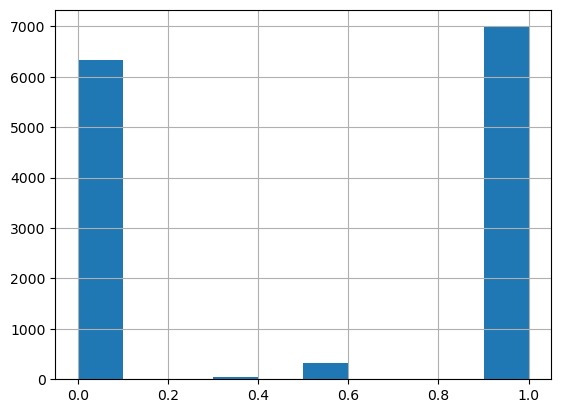

In [45]:
df['IN_SIGMA-ALDRICH'].hist()

In [56]:
(df
 .assign(in_sigma_aldrich = np.floor(df['IN_SIGMA-ALDRICH']).where(df['IN_SIGMA-ALDRICH'].notna()).astype('Int64'))
 .query('0< `IN_SIGMA-ALDRICH` < 1')
 [['in_sigma_aldrich', 'IN_SIGMA-ALDRICH']]
)

,in_sigma_aldrich,IN_SIGMA-ALDRICH
58,0,0.5
66,0,0.5
76,0,0.5
91,0,0.5
815,0,0.5
...,...,...
13179,0,0.5
13985,0,0.5
14019,0,0.5
14056,0,0.5


In [83]:
df = (df
 .assign(vendor_count = np.floor(df['VENDOR_COUNT']).where(df['VENDOR_COUNT'].notna()).astype('Int64'))
 .assign(in_sigma_aldrich = np.floor(df['IN_SIGMA-ALDRICH']).where(df['IN_SIGMA-ALDRICH'].notna()).astype('Int64'))
.drop(['VENDOR_COUNT', 'IN_SIGMA-ALDRICH'], axis =1)
)

In [74]:
map_df.loc[map_df['Column name'] =='VENDOR_COUNT']

,Column name,Explanation
22,VENDOR_COUNT,Count of Vendors using Pubchem


In [76]:
map_df.at[22, 'Column name'] = 'vendor_count'

In [77]:
map_df.at[22, 'Column name'] 

'vendor_count'

In [79]:
map_df.loc[map_df['Column name'] == 'IN_SIGMA-ALDRICH']

,Column name,Explanation
23,IN_SIGMA-ALDRICH,Tag for whether the vendor was Sigma Aldrich


In [80]:
map_df.at[23, 'Column name'] ='in_sigma_aldrich'

In [81]:
map_df.at[23, 'Column name'] 

'in_sigma_aldrich'

In [84]:
writer = pd.ExcelWriter(interim_dir+'tsca_categorisation_071124_wmappingdict.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.

df.to_excel(writer)
map_df.to_excel(writer, sheet_name = 'mapping_dict')

writer.close()

In [92]:
#df.info()